<a href="https://colab.research.google.com/github/jli184/UM_WolverinePathways_2023/blob/main/pathways2023_ALeRCE_LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to ALeRCE API +


We will use the ALERCE package to:
- retrieve light curves of certain objects with object id/class
- plot light curves

https://alerce.readthedocs.io/en/latest/

In [ ]:
pip install alerce



### Step 1. Import the packages needed for this notebook
These packages have useful functions to help us code efficiently

In [ ]:
from alerce.core import Alerce
alerce = Alerce()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Plot a light curve using an object ID.

In [ ]:
oids = ['ZTF20abvtozi','ZTF19acbpxwt','ZTF19ablkizm','ZTF20abxgwjr','ZTF19abwaohs','ZTF18ablsygx','ZTF18aakmfwg','ZTF18aaqlyhv','ZTF19aadevks','ZTF20aattqak','ZTF18adkoxym','ZTF18abjujbn','ZTF18adlhfse','ZTF18aaqburg','ZTF18abnueqk','ZTF18abqcpqj','ZTF18aaozcto','ZTF18aaspnuh','ZTF18aaspnuh','ZTF18aaqkfet','ZTF18aaquirh','TF21abbkefe','ZTF21aaabaey','ZTF20aboquuv','ZTF20aaawmxq','ZTF22aauxzqe','ZTF20abbozif','ZTF19abmylxw','ZTF17aabukxa','ZTF18aaupokz','ZTF17aabotsw','ZTF18abmreij','ZTF19abfucud','ZTF18admdaof','ZTF18abdeyln','ZTF18adkgwlb','ZTF18aaquirh'] ## random example
objects = alerce.query_objects(oid=oids, format="pandas")
objects

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF20abvtozi,172,1515,59083.476030,59189.221250,False,False,174,-0.025095,NaN,...,59189.221250,105.745220,51.623669,33.748571,0.000054,0.000030,None,None,None,corr_bulk_0.0.1
1,ZTF19acbpxwt,109,2841,58757.201331,58795.080451,False,False,104,-0.088064,0.657069,...,58795.080451,36.945556,240.986877,65.671158,0.000145,0.000040,None,None,None,corr_bulk_0.0.1
2,ZTF19ablkizm,121,818,58696.310891,58733.273692,False,False,103,0.006666,NaN,...,58733.273692,36.962801,287.068596,75.833101,0.000170,0.000035,None,None,None,corr_bulk_0.0.1
3,ZTF20abxgwjr,251,2158,59089.222512,59155.082049,False,False,110,-0.078211,1.543002,...,59155.081123,64.893333,267.275225,61.630704,0.000047,0.000025,None,None,None,corr_bulk_0.0.1
4,ZTF19abwaohs,226,1197,58727.176759,58798.206343,False,False,100,-0.038109,NaN,...,58798.206343,70.889178,297.353897,62.518881,0.000070,0.000031,None,None,None,corr_bulk_0.0.1
5,ZTF18ablsygx,390,1031,58337.250000,59817.250000,True,False,242,0.052600,0.505985,...,59817.201759,1480.032454,242.936766,0.857231,0.000055,0.000053,None,None,None,dev
6,ZTF18aakmfwg,519,4239,58215.250000,60089.250000,True,False,203,0.375769,0.063351,...,60089.262107,1841.024931,176.362178,33.512357,0.000079,0.000057,None,None,None,1.2.0
7,ZTF18aaqlyhv,1002,2699,58243.250000,60172.250000,True,False,337,0.007657,0.748482,...,60172.227350,1923.895787,212.615328,49.049426,0.000075,0.000050,None,None,None,1.2.0
8,ZTF19aadevks,491,894,58257.250000,60223.500000,True,False,288,-0.301823,0.401278,...,60223.523704,1729.059942,149.872802,3.183785,0.000061,0.000049,None,None,None,1.2.1
9,ZTF20aattqak,451,1686,58827.500000,60194.250000,True,False,222,-0.007294,0.384567,...,60194.174294,1257.733530,228.404377,20.192680,0.000052,0.000054,None,None,None,1.2.0


In [ ]:
## query the light curve data (detections & non-detections)
detections = alerce.query_detections(objects['oid'][1],format="pandas")
non_detections = alerce.query_non_detections(objects['oid'][1],format="pandas")

## print the light curve columns
print(detections.keys())
print(non_detections.keys())

Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magap', 'sigmapsf', 'sigmagap', 'ra', 'dec', 'rb',
       'rbversion', 'drb', 'magapbig', 'sigmagapbig', 'rfid', 'has_stamp',
       'corrected', 'dubious', 'step_id_corr', 'phase', 'parent_candid',
       'magpsf_corr', 'sigmapsf_corr', 'sigmapsf_corr_ext'],
      dtype='object')
Index(['tid', 'mjd', 'fid', 'diffmaglim'], dtype='object')


In [ ]:
detections

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,rfid,has_stamp,corrected,dubious,step_id_corr,phase,parent_candid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
0,ztf,58758.134896,1004134894815015000,1,1004134894815,20.228848,1,1004,2.350851,19.294249,...,823120148.0,False,False,False,bulk_1.0.0,0.0,1004187231415015013,NaN,NaN,NaN
1,ztf,58758.158970,1004158966015015000,2,1004158966015,19.771630,1,1004,0.706012,19.032427,...,824120260.0,False,True,False,bulk_1.0.0,0.0,1004186786015015001,18.421062,0.053052,0.075571
2,ztf,58758.159421,1004159421415015005,2,1004159421415,19.663166,1,1004,2.130964,19.300425,...,847120214.0,False,False,True,bulk_1.0.0,0.0,1004186786015015001,NaN,NaN,NaN
3,ztf,58758.186782,1004186786015015001,1,1004186786015,19.954012,1,1004,2.288873,19.187864,...,824120160.0,False,False,False,bulk_1.0.0,0.0,1004187231415015013,NaN,NaN,NaN
4,ztf,58758.187234,1004187231415015013,1,1004187231415,19.887718,1,1004,1.039869,19.179743,...,847120114.0,False,True,True,bulk_1.0.0,0.0,1014167896015015001,18.784110,0.103485,0.106330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,ztf,58789.139224,1035139226015015001,2,1035139226015,19.397038,1,1035,0.507862,18.991806,...,824120260.0,False,True,False,bulk_1.0.0,0.0,1036112891415015003,18.397745,0.075341,0.091929
100,ztf,58789.139676,1035139671415015011,2,1035139671415,19.214636,1,1035,2.821492,18.975887,...,847120214.0,False,False,True,bulk_1.0.0,0.0,1036112891415015003,NaN,NaN,NaN
101,ztf,58790.112893,1036112891415015003,2,1036112891415,19.428547,1,1036,2.253906,18.923527,...,847120214.0,False,False,True,bulk_1.0.0,0.0,1041080006015015004,NaN,NaN,NaN
102,ztf,58795.080000,1041080006015015004,2,1041080006015,19.399881,1,1041,0.539698,19.150625,...,824120260.0,False,True,False,bulk_1.0.0,0.0,1041080451415015010,18.486786,0.066064,0.087371


Use mask to split the filters: 1 = g-band, 2 = r-band.

Use "plot" or "errorbar" to plot the light curve (scatter plot).

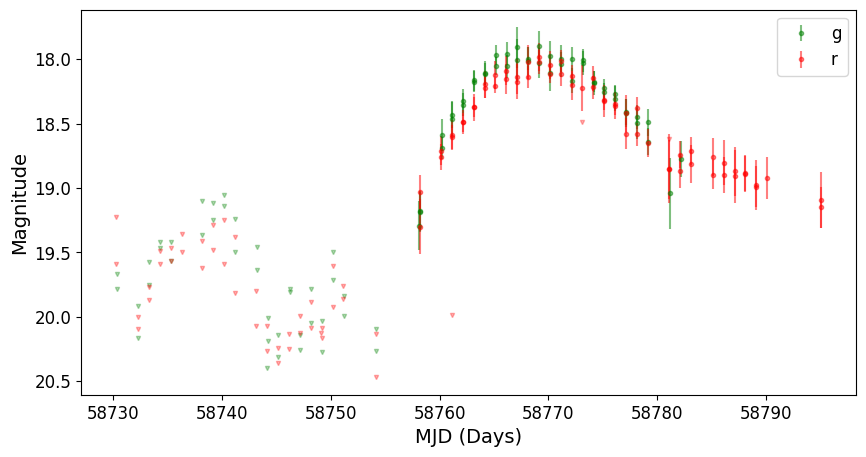

In [ ]:
## plot the difference magnitude light curve

plt.figure(figsize=(10,5))

## plot detections with errorbars
mask = detections.fid == 1
plt.errorbar(detections[mask].mjd,detections[mask].magpsf,detections[mask].sigmapsf,fmt='g.',label='g',alpha=0.5)
mask = detections.fid == 2
plt.errorbar(detections[mask].mjd,detections[mask].magpsf,detections[mask].sigmapsf,fmt='r.',label='r',alpha=0.5)

## plot the non-detection upper limits
mask = non_detections.fid == 1
plt.plot(non_detections[mask].mjd, non_detections[mask].diffmaglim,'gv',alpha=0.3,markersize=3)
mask = non_detections.fid == 2
plt.plot(non_detections[mask].mjd, non_detections[mask].diffmaglim,'rv',alpha=0.3,markersize=3)

plt.gca().invert_yaxis() ## invert y-axis because smaller magnitude = brighter
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('MJD (Days)',fontsize=14)
plt.ylabel('Magnitude',fontsize=14)
plt.legend(fontsize=12)
plt.savefig('plot1.pdf')

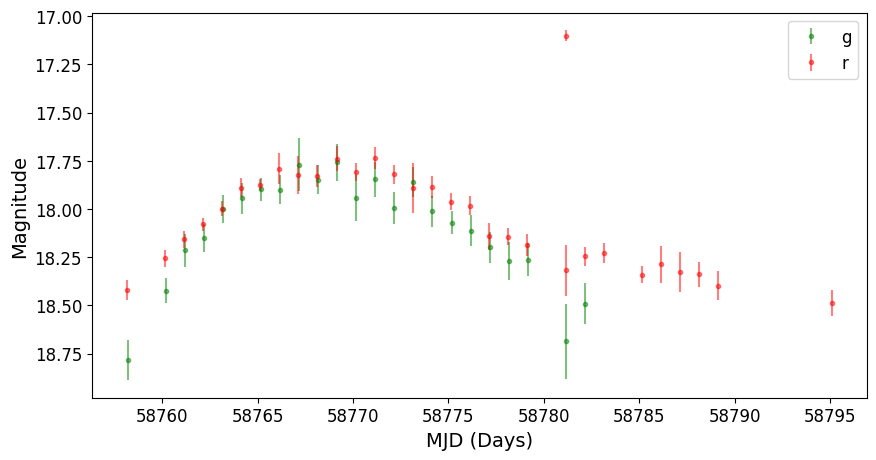

In [ ]:
## plot the apparant magnitude light curve (no non-detections)

detections.dropna(inplace=True, subset=['magpsf_corr','sigmapsf_corr'])

plt.figure(figsize=(10,5))

## plot detections with errorbars
mask = detections.fid == 1

plt.errorbar(detections[mask].mjd,detections[mask].magpsf_corr,detections[mask].sigmapsf_corr,fmt='g.',label='g',alpha=0.5)
mask = detections.fid == 2
plt.errorbar(detections[mask].mjd,detections[mask].magpsf_corr,detections[mask].sigmapsf_corr,fmt='r.',label='r',alpha=0.5)

plt.gca().invert_yaxis() ## invert y-axis because smaller magnitude = brighter
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('MJD (Days)',fontsize=14)
plt.ylabel('Magnitude',fontsize=14)
plt.legend(fontsize=12)

In [ ]:
print (detections["magpsf_corr"])

1      18.421062
4      18.784110
5      18.255768
8      18.422740
9      18.157244
12     18.214016
13     18.079582
16     18.150465
17     17.997726
20     18.000172
21     17.888618
24     17.943464
25     17.877382
28     17.898436
29     17.790968
32     17.898888
33     17.825418
36     17.770441
37     17.828852
40     17.847692
41     17.738111
44     17.758324
45     17.808512
48     17.942640
49     17.734354
52     17.846628
53     17.819520
56     17.994358
57     17.889528
59     17.859165
60     17.888002
63     18.010687
64     17.960957
67     18.069840
68     17.981691
71     18.112585
72     18.139910
75     18.198112
76     18.142525
79     18.270643
80     18.187407
82     18.262510
83     18.317356
84     17.101255
85     18.686535
86     18.245522
88     18.490469
89     18.228395
91     18.341398
93     18.286512
95     18.326096
97     18.338139
99     18.397745
102    18.486786
Name: magpsf_corr, dtype: float64


## Step 3. Query the ALeRCE data base

First, we look at the classifier options.


In [ ]:
classifiers = alerce.query_classifiers()

In [ ]:
print('classes in the ALERCE broker:')
classifiers

classes in the ALERCE broker:


[{'classifier_name': 'lc_classifier',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['SNIa',
   'SNIbc',
   'SNII',
   'SLSN',
   'QSO',
   'AGN',
   'Blazar',
   'CV/Nova',
   'YSO',
   'LPV',
   'E',
   'DSCT',
   'RRL',
   'CEP',
   'Periodic-Other']},
 {'classifier_name': 'lc_classifier_top',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['Transient', 'Stochastic', 'Periodic']},
 {'classifier_name': 'lc_classifier_transient',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['SNIa', 'SNIbc', 'SNII', 'SLSN']},
 {'classifier_name': 'lc_classifier_stochastic',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['QSO', 'AGN', 'Blazar', 'CV/Nova', 'YSO']},
 {'classifier_name': 'lc_classifier_periodic',
  'classifier_version': 'hierarchical_random_forest_1.0.0',
  'classes': ['LPV', 'E', 'DSCT', 'RRL', 'CEP', 'Periodic-Other']},
 {'classifier_name': 'stamp_classifier',
  'classifier_versio

Next, we query the database for objects.

Set parameters to choose the desired classifier, class, probability, etc...
- classifer
- class_name
- probability
- format
- ndet
- order_by
- order_mode:

reference: https://alerce.readthedocs.io/en/latest/apis.html#alerce.core.Alerce.query_objects

"query_objects" will return a list of objects selected by the parameters.

In [ ]:
params = {"classifier":"lc_classifier","class_name":"SNIa","probability":0.5,"format":"pandas","ndet":[100,10000],"order_by":'ndet',"order_mode":"DESC"}
objects = alerce.query_objects(**params)

In [ ]:
pd.set_option('display.max_columns', None)
print(objects.head(5))

            oid ndethist  ncovhist  mjdstarthist    mjdendhist  corrected  \
0  ZTF20abvtozi      172      1515  59083.476030  59189.221250      False   
1  ZTF20aayxldg      398      2232  58978.310174  59072.200625      False   
2  ZTF20aaavvlv      196       885  58849.424769  58912.215648      False   
3  ZTF22aasxakz      135      2276  59770.500000  59867.250000      False   
4  ZTF20abojcmt      151      2277  59052.479433  59091.472234      False   

   stellar  ndet   g_r_max  g_r_max_corr  g_r_mean  g_r_mean_corr  \
0    False   174 -0.025095           NaN  0.323168            NaN   
1    False   169  0.076988           NaN  0.370358            NaN   
2    False   160 -0.244247           NaN  0.329729            NaN   
3    False   152 -0.045295           NaN  0.300943            NaN   
4    False   150 -0.007723           NaN  0.165750            NaN   

       firstmjd       lastmjd     deltajd      meanra    meandec   sigmara  \
0  59083.476030  59189.221250  105.745220   

In [ ]:
## print the table columns
print(objects.keys())

Index(['oid', 'ndethist', 'ncovhist', 'mjdstarthist', 'mjdendhist',
       'corrected', 'stellar', 'ndet', 'g_r_max', 'g_r_max_corr', 'g_r_mean',
       'g_r_mean_corr', 'firstmjd', 'lastmjd', 'deltajd', 'meanra', 'meandec',
       'sigmara', 'sigmadec', 'class', 'classifier', 'probability',
       'step_id_corr'],
      dtype='object')


### plot the light curves of the first object from the database

Note: python indexing starts at 0

In [ ]:
detections = alerce.query_detections(objects['oid'][3],format="pandas")
non_detections = alerce.query_non_detections(objects['oid'][3],format="pandas")

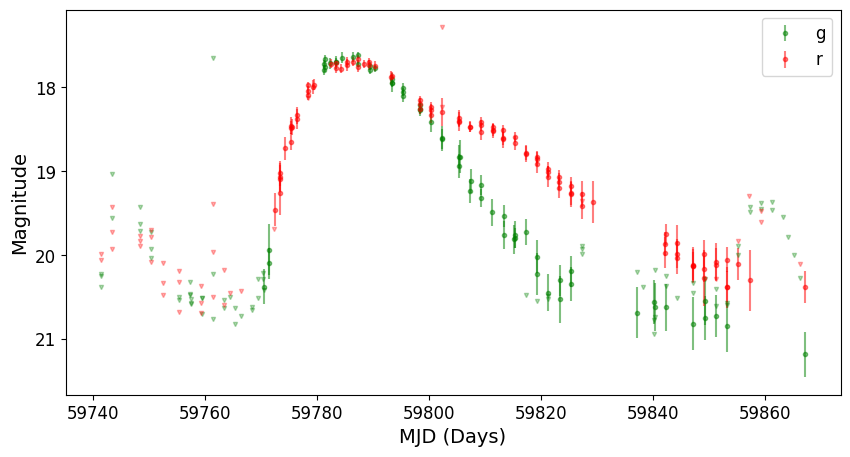

In [ ]:
plt.figure(figsize=(10,5))

## plot detections with errorbars
mask = detections.fid == 1
plt.errorbar(detections[mask].mjd,detections[mask].magpsf,detections[mask].sigmapsf,fmt='g.',label='g',alpha=0.5)
mask = detections.fid == 2
plt.errorbar(detections[mask].mjd,detections[mask].magpsf,detections[mask].sigmapsf,fmt='r.',label='r',alpha=0.5)

## plot the non-detection upper limits
mask = non_detections.fid == 1
plt.plot(non_detections[mask].mjd, non_detections[mask].diffmaglim,'gv',alpha=0.3,markersize=3)
mask = non_detections.fid == 2
plt.plot(non_detections[mask].mjd, non_detections[mask].diffmaglim,'rv',alpha=0.3,markersize=3)

plt.gca().invert_yaxis() ## invert y-axis because smaller magnitude = brighter
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('MJD (Days)',fontsize=14)
plt.ylabel('Magnitude',fontsize=14)
plt.legend(fontsize=12)

In [ ]:
detections.dropna(inplace=True, subset=['magpsf_corr','sigmapsf_corr'])

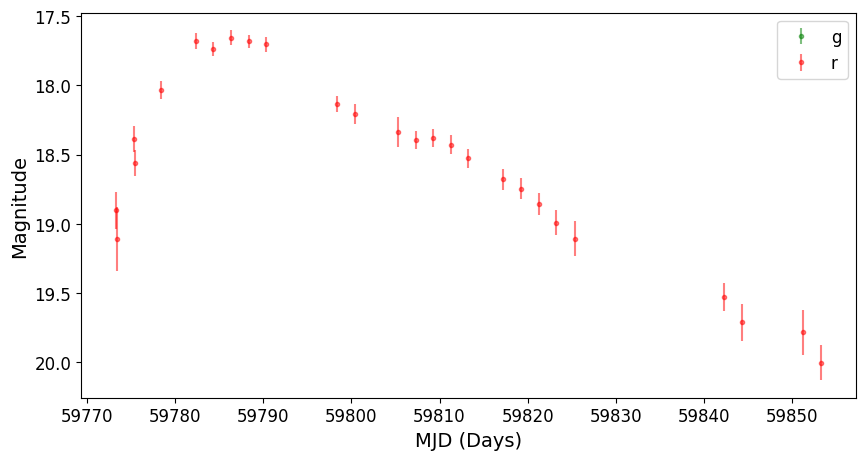

In [ ]:
## plot the apparant magnitude light curve (no non-detections)

plt.figure(figsize=(10,5))

## plot detections with errorbars
mask = detections.fid == 1
plt.errorbar(detections[mask].mjd,detections[mask].magpsf_corr,detections[mask].sigmapsf_corr,fmt='g.',label='g',alpha=0.5)
mask = detections.fid == 2
plt.errorbar(detections[mask].mjd,detections[mask].magpsf_corr,detections[mask].sigmapsf_corr,fmt='r.',label='r',alpha=0.5)

plt.gca().invert_yaxis() ## invert y-axis because smaller magnitude = brighter
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('MJD (Days)',fontsize=14)
plt.ylabel('Magnitude',fontsize=14)
plt.legend(fontsize=12)

## Step 4. Make functions for getting data + plotting light curves

In [ ]:
## plot the difference magnitude light curve

def plot_diffLC(oid):

    detections = alerce.query_detections(oid,format="pandas")
    non_detections = alerce.query_non_detections(oid,format="pandas")
    print(detections.keys())

    detections.dropna(inplace=True, subset=['magpsf','sigmapsf'])
    non_detections.dropna(inplace=True, subset=['diffmaglim'])

    plt.subplots(figsize = (10, 5))
    labels = {1: 'g', 2: 'r'}
    colors = {1: 'g', 2: 'r'}
    markers = {1: 'o', 2: 's'}

    # loop the passbands
    for fid in [1, 2]:

        # plot detections if available
        mask = detections.fid == fid
        if np.sum(mask) > 0:
            plt.errorbar(detections[mask].mjd, detections[mask].magpsf,
                yerr = detections[mask].sigmapsf, c = colors[fid], fmt=markers[fid], label = labels[fid],
                markersize=3)

        # plot non detections if available
        mask = (non_detections.fid == fid) & (non_detections.diffmaglim > -900)
        if np.sum(mask) > 0:
            # non detections index is mjd
            plt.plot(non_detections[mask].mjd, non_detections[mask].diffmaglim, c=colors[fid], alpha = 0.5,
                marker='v', label="lim.mag. %s" % labels[fid], linestyle='', markersize=3)

    plt.title(oid)
    plt.gca().invert_yaxis() ## invert y-axis because smaller magnitude = brighter
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel('MJD',fontsize=14)
    plt.ylabel('Difference Magnitude',fontsize=14)
    plt.legend(fontsize=12)

    return;


In [ ]:
## plot the apparent magnitude light curve

def plot_corrLC(oid):

    detections = alerce.query_detections(oid,format="pandas")
    #detections.dropna(inplace=True, subset=['magpsf_corr','sigmapsf_corr'])

    plt.subplots(figsize = (10, 5))
    labels = {1: 'g', 2: 'r'}
    colors = {1: 'g', 2: 'r'}
    markers = {1: 'o', 2: 's'}

    # loop the passbands
    for fid in [1, 2]:

        # plot detections if available
        mask = detections.fid == fid
        if np.sum(mask) > 0:
            # note that the detections index is candid and that we are plotting the psf corrected magnitudes
            plt.errorbar(detections[mask].mjd, detections[mask].magpsf_corr,
                yerr = detections[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = labels[fid],
                         alpha=0.8, markersize=3)


    plt.title(oid)
    plt.gca().invert_yaxis() ## invert y-axis because smaller magnitude = brighter
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel('MJD',fontsize=14)
    plt.ylabel('Apparent Magnitude',fontsize=14)
    plt.legend(fontsize=12)

In [ ]:
oid = np.unique(objects['oid'])
print(oid[:5])

['ZTF19abinjcy' 'ZTF20aaavvlv' 'ZTF20aayxldg' 'ZTF20abbozif'
 'ZTF20abeljuj']


Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magpsf_corr', 'magap', 'sigmapsf', 'sigmapsf_corr',
       'sigmapsf_corr_ext', 'sigmagap', 'ra', 'dec', 'rb', 'rbversion',
       'magapbig', 'sigmagapbig', 'has_stamp', 'corrected', 'dubious',
       'step_id_corr', 'phase', 'parent_candid', 'drb', 'rfid'],
      dtype='object')
Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magap', 'sigmapsf', 'sigmagap', 'ra', 'dec', 'rb',
       'rbversion', 'magapbig', 'sigmagapbig', 'has_stamp', 'corrected',
       'dubious', 'step_id_corr', 'phase', 'parent_candid', 'drb', 'rfid'],
      dtype='object')
Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magap', 'sigmapsf', 'sigmagap', 'ra', 'dec', 'rb',
       'rbversion', 'drb', 'magapbig', 'sigmagapbig', 'rfid', 'has_stamp',
       'corrected', 'dubious', 'step_id_corr', 'p

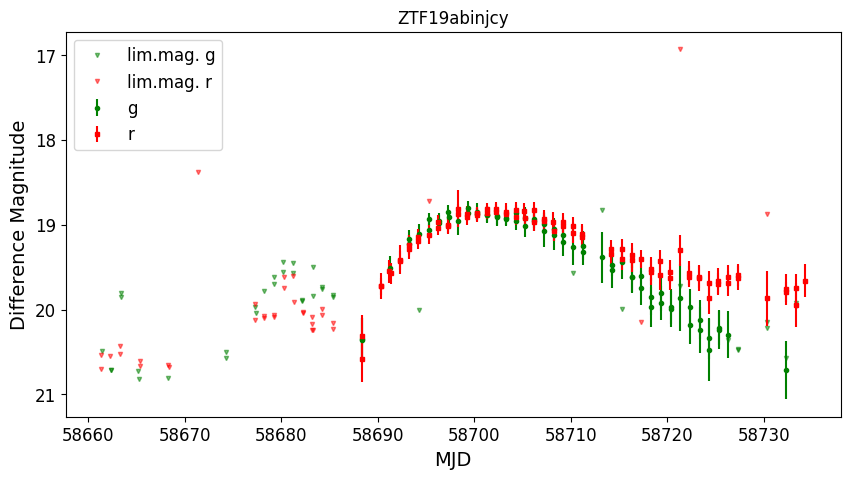

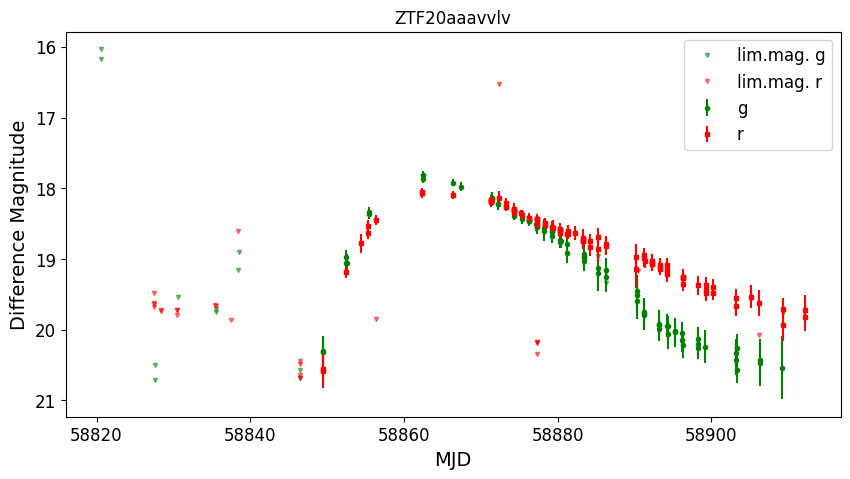

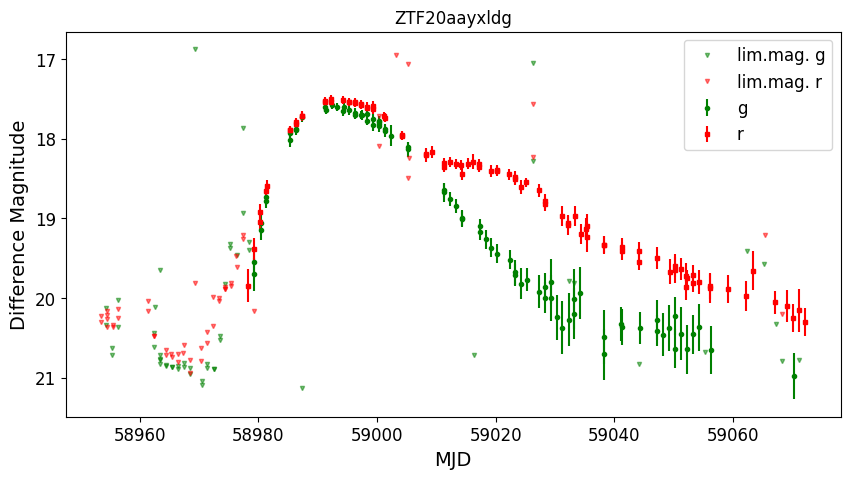

In [ ]:
for oid in np.unique(objects['oid'])[:3]:
  plot_diffLC(oid)

In [ ]:
for oid in np.unique(objects['oid'])[:3]:
  plot_corrLC(oid)

APIError: ignored